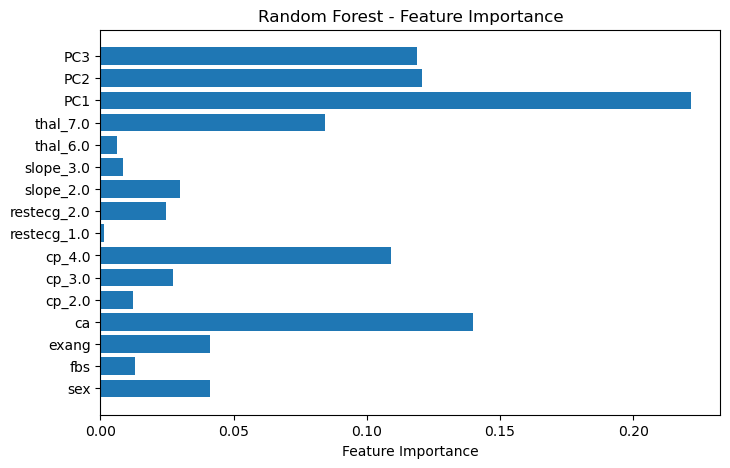

Top 5 Features:
PC1
ca
PC2
PC3
cp_4.0


In [9]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

model = RandomForestClassifier()
df=pd.read_csv("../data/Trained_pca_heart.csv")
test=pd.read_csv("../data/Test_pca_heart.csv")
y=df['target']
X=df.drop('target', axis=1)
model.fit(X, y)
# Plot
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()

# Print top 5 features
top_5 = [(feat_names[i]) for i in importances.argsort()[-5:][::-1]]
print("Top 5 Features:")
for f in top_5:
    print(f)


c:\Users\ahmed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


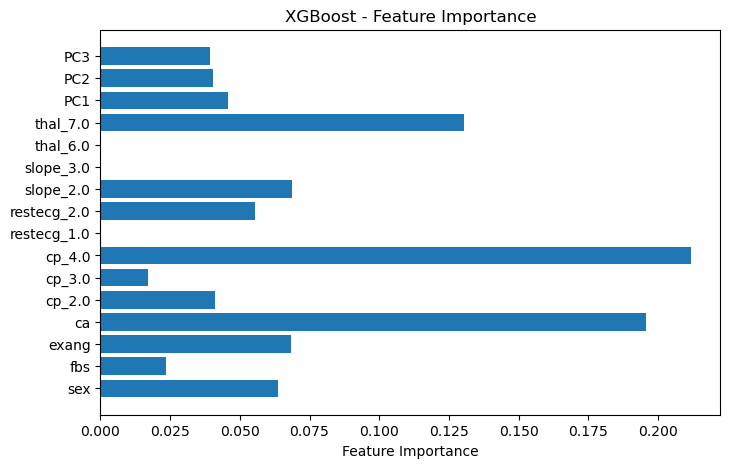

Top 5 Features:
cp_4.0
ca
thal_7.0
slope_2.0
exang


In [1]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("../data/Trained_pca_heart.csv")
test = pd.read_csv("../data/Test_pca_heart.csv")
y = df['target']
X = df.drop('target', axis=1)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feat_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost - Feature Importance")
plt.show()

# Top 5 Features
top_5_indices = np.argsort(importances)[-5:][::-1]
top_5 = feat_names[top_5_indices]
print("Top 5 Features:")
for f in top_5:
    print(f)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  
rfe.fit(X, y)
selectedrfe = X.columns[rfe.support_]
print("Selected Features:", selectedrfe.tolist())

Selected Features: ['sex', 'ca', 'cp_4.0', 'thal_7.0', 'PC1']


In [11]:
from sklearn.feature_selection import SelectKBest, chi2



encoded_features = df.drop(columns=['target', 'PC1', 'PC2', 'PC3'])



y = df['target']


selector = SelectKBest(score_func=chi2, k=5)  
X_new = selector.fit_transform(encoded_features, y)


selected = selector.get_support()
selected_features = encoded_features.columns[selected]
print("Top features by Chi²:", selected_features.tolist())

Top features by Chi²: ['exang', 'ca', 'cp_4.0', 'slope_2.0', 'thal_7.0']


In [12]:

chi2_features = selected_features.tolist()
rfe_features = selectedrfe.tolist()
rf_features = top_5
print(chi2_features,rfe_features,rf_features)
print('#'*1000)
# Convert to sets
chi2_set = set(chi2_features)
rfe_set = set(rfe_features)
rf_set  = set(rf_features)
print (rf_set,chi2_set,rfe_set)
# Find common features
overlap_all = chi2_set & rfe_set & rf_set
overlap_chi_rfe = chi2_set & rfe_set
overlap_chi_rf = chi2_set & rf_set
overlap_rfe_rf = rfe_set & rf_set

# Print results
print("Overlap in all 3 methods:", overlap_all)
print("Chi² ∩ RFE:", overlap_chi_rfe)
print("Chi² ∩ RF:", overlap_chi_rf)
print("RFE ∩ RF:", overlap_rfe_rf)

['exang', 'ca', 'cp_4.0', 'slope_2.0', 'thal_7.0'] ['sex', 'ca', 'cp_4.0', 'thal_7.0', 'PC1'] ['PC1', 'ca', 'PC2', 'PC3', 'cp_4.0']
####################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [13]:
#So we can that the best are 
#best_features = ['exang', 'ca', 'cp_3.0', 'cp_4.0', 'thal_7.0']

In [14]:
##lets do some cross vaildation on the best features
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

feature_sets = {
    'Chi2': chi2_features,
    'RandomForest': rf_features,
    'RFE': rfe_features,
    'otherfeatures':['ca', 'cp_4.0', 'thal_7.0', 'PC1','exang','cp_3.0'],
    'all':X.columns,
    'lestone':['thal_7.0', 'ca'],
    'test1':['exang', 'ca', 'cp_3.0', 'cp_4.0', 'thal_7.0','PC1']
}

model = RandomForestClassifier(random_state=42)
results = {}

for name, features in feature_sets.items():
    scores = cross_val_score(model, X[features], y, cv=5)
    results[name] = scores
    print(f"{name} mean accuracy: {scores.mean():.3f}")

Chi2 mean accuracy: 0.806
RandomForest mean accuracy: 0.707
RFE mean accuracy: 0.757
otherfeatures mean accuracy: 0.766
all mean accuracy: 0.829
lestone mean accuracy: 0.748
test1 mean accuracy: 0.780


In [15]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Store logistic results
logistic_results = {}

print("\n📊 Logistic Regression Results:")
for name, features in feature_sets.items():
    scores = cross_val_score(logistic_model, X[features], y, cv=5)
    logistic_results[name] = scores
    print(f"{name} mean accuracy: {scores.mean():.3f}")


📊 Logistic Regression Results:
Chi2 mean accuracy: 0.798
RandomForest mean accuracy: 0.779
RFE mean accuracy: 0.824
otherfeatures mean accuracy: 0.824
all mean accuracy: 0.793
lestone mean accuracy: 0.762
test1 mean accuracy: 0.824


In [16]:
from xgboost import XGBClassifier

# Create XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Store XGBoost results
xgb_results = {}

print("\n📊 XGBoost Results:")
for name, features in feature_sets.items():
    scores = cross_val_score(xgb_model, X[features], y, cv=5)
    xgb_results[name] = scores
    print(f"{name} mean accuracy: {scores.mean():.3f}")


📊 XGBoost Results:
Chi2 mean accuracy: 0.811
RandomForest mean accuracy: 0.730
RFE mean accuracy: 0.766
otherfeatures mean accuracy: 0.780
all mean accuracy: 0.771
lestone mean accuracy: 0.753
test1 mean accuracy: 0.775


In [17]:
final_features = ['exang', 'ca', 'cp_3.0', 'cp_4.0', 'thal_7.0']

# Create train and test feature sets
selected_df = X[final_features].copy()
selected_df['target'] = y  

test_df = test[final_features].copy()
test_df['target'] = test['target']

# Save both properly
selected_df.to_csv("../data/Trained_selected_features.csv", index=False)
test_df.to_csv("../data/Test_selected_features.csv", index=False)

print("✅ Saved selected features for both train and test sets.")

✅ Saved selected features for both train and test sets.


In [18]:
print(selected_df.head())
test_df.head()

   exang        ca  cp_3.0  cp_4.0  thal_7.0  target
0    0.0  0.333333       0       0         0       1
1    0.0  0.000000       1       0         0       0
2    0.0  0.333333       1       0         0       0
3    0.0  0.000000       0       0         0       0
4    0.0  0.000000       0       0         0       0


,exang,ca,cp_3.0,cp_4.0,thal_7.0,target
0,0.0,0.0,1,0,0,0
1,0.0,0.0,1,0,0,0
2,0.0,0.0,0,1,0,0
3,0.0,0.0,0,0,0,0
4,0.0,0.0,0,0,0,0
